In [1]:
import pandas as pd
from datetime import *
import json
import yfinance

df = pd.read_csv('spx2020.csv')
df = df.drop(columns=['Unnamed: 0'])
df['# of earnings'] = -1
df['% of positive impact of earnings'] = -1.0
df['average return after earnings'] = -1.0
df['# of positive surprise earnings'] = -1
df['% of positive impact of earnings when positive surprise'] = -1.0
df['average return after earnings when positive surprise'] = -1.0
df['# of negative surprise earnings'] = -1
df['% of positive impact of earnings when negative surprise'] = -1.0
df['average return after earnings when negative surprise'] = -1.0
df

,ticker,company,# of earnings,% of positive impact of earnings,average return after earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,average return after earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise,average return after earnings when negative surprise
0,VIAC,VIACOMCBS INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
1,SCHW,SCHWAB CHARLES CORP NEW,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
2,CSCO,CISCO SYSTEMS INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
3,HD,HOME DEPOT INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
4,QCOM,QUALCOMM INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
499,FOX,FOX CORP,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
500,GOOG,GOOGLE INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
501,GOOGL,GOOGLE INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0
502,UA,UNDER ARMOUR INC,-1,-1.0,-1.0,-1,-1.0,-1.0,-1,-1.0,-1.0


In [2]:
for i in range(len(df)):
    stock_abbr = df.at[i, 'ticker']
    print(stock_abbr)
    !node get_earnings2.js {stock_abbr}
    f = open(f'{stock_abbr}.json')
    earnings = json.load(f)
    f.close()
    !rm {stock_abbr}.json

    start, end = '1995-01-01', '2022-12-31'
    stock_ticker = yfinance.Ticker(stock_abbr)
    stock = stock_ticker.history(start=start, end=end)
    stock['Close_t+1'] = stock.Close.shift(-1)

    count, count_up, returns = 0, 0, 0
    count_pos, count_pos_up, returns_pos = 0, 0, 0
    count_neg, count_neg_up, returns_neg = 0, 0, 0
    for j in range(len(earnings)):
        if earnings[j]['eps'] and earnings[j]['date'] in stock.index:
            count += 1
            returns += stock.loc[earnings[j]['date'], 'Close_t+1'] / stock.loc[earnings[j]['date'], 'Close'] - 1
            if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                count_up += 1
            if earnings[j]['estimated_eps']:
                if earnings[j]['estimated_eps'] < earnings[j]['eps']:
                    count_pos += 1
                    returns_pos += stock.loc[earnings[j]['date'], 'Close_t+1'] / stock.loc[earnings[j]['date'], 'Close'] - 1
                    if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                        count_pos_up += 1
                elif earnings[j]['estimated_eps'] > earnings[j]['eps']:
                    count_neg += 1
                    returns_neg += stock.loc[earnings[j]['date'], 'Close_t+1'] / stock.loc[earnings[j]['date'], 'Close'] - 1
                    if stock.loc[earnings[j]['date'], 'Close_t+1'] > stock.loc[earnings[j]['date'], 'Close']:
                        count_neg_up += 1
    pos_impact = count_up / count if count > 0 else -1
    pos_pos_impact = count_pos_up / count_pos if count_pos > 0 else -1
    neg_pos_impact = count_neg_up / count_neg if count_neg > 0 else -1
    avg_returns = returns / count if count > 0 else -1
    avg_returns_pos = returns_pos / count_pos if count_pos > 0 else -1
    avg_returns_neg = returns_neg / count_neg if count_neg > 0 else -1
    df.at[i, '# of earnings'] = count
    df.at[i, '% of positive impact of earnings'] = pos_impact
    df.at[i, 'average return after earnings'] = avg_returns
    df.at[i, '# of positive surprise earnings'] = count_pos
    df.at[i, '% of positive impact of earnings when positive surprise'] = pos_pos_impact
    df.at[i, 'average return after earnings when positive surprise'] = avg_returns_pos
    df.at[i, '# of negative surprise earnings'] = count_neg
    df.at[i, '% of positive impact of earnings when negative surprise'] = neg_pos_impact
    df.at[i, 'average return after earnings when negative surprise'] = avg_returns_neg
    print(f'earnings count: {count}')
    print(f'positive impact: {pos_impact}')
    print(f'average return after earnings: {avg_returns}')
    print(f'positive surprise count: {count_pos}')
    print(f'positive impact on positive surprise: {pos_pos_impact}')
    print(f'average return after earnings when positive surprise: {avg_returns_pos}')
    print(f'negative surprise count: {count_neg}')
    print(f'positive impact on negative surprise: {neg_pos_impact}')
    print(f'average return after earnings when negative surprise: {avg_returns_neg}\n')

VIAC
- VIAC: No data found, symbol may be delisted
earnings count: 0
positive impact: -1
average return after earnings: -1
positive surprise count: 0
positive impact on positive surprise: -1
average return after earnings when positive surprise: -1
negative surprise count: 0
positive impact on negative surprise: -1
average return after earnings when negative surprise: -1

SCHW
earnings count: 112
positive impact: 0.5089285714285714
average return after earnings: 0.0005227220096574269
positive surprise count: 45
positive impact on positive surprise: 0.5333333333333333
average return after earnings when positive surprise: -0.0004894874554968325
negative surprise count: 19
positive impact on negative surprise: 0.2631578947368421
average return after earnings when negative surprise: -0.012681413594680266

CSCO
earnings count: 112
positive impact: 0.5178571428571429
average return after earnings: -0.0005520267362488388
positive surprise count: 92
positive impact on positive surprise: 0.53260

In [3]:
df = df[df['% of positive impact of earnings'] != -1]
df = df.reset_index(drop=True)
df.to_csv('earnings_impact3.csv', index=False)
df

,ticker,company,# of earnings,% of positive impact of earnings,average return after earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,average return after earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise,average return after earnings when negative surprise
0,SCHW,SCHWAB CHARLES CORP NEW,112,0.508929,0.000523,45,0.533333,-0.000489,19,0.263158,-0.012681
1,CSCO,CISCO SYSTEMS INC,112,0.517857,-0.000552,92,0.532609,0.002717,1,0.000000,-0.131119
2,HD,HOME DEPOT INC,112,0.464286,-0.002094,81,0.432099,-0.002416,9,0.666667,-0.004779
3,QCOM,QUALCOMM INC,110,0.500000,0.010434,76,0.500000,0.010305,9,0.555556,0.015614
4,AES,A E S CORP,111,0.549550,0.007860,59,0.559322,0.012154,30,0.500000,0.006902
...,...,...,...,...,...,...,...,...,...,...,...
402,VTRS,VIATRIS INC,112,0.553571,0.001920,68,0.617647,0.008405,28,0.321429,-0.017960
403,TSLA,TESLA INC,48,0.479167,0.010194,25,0.560000,0.025734,9,0.333333,-0.036748
404,GOOGL,GOOGLE INC,73,0.589041,0.016141,43,0.744186,0.037409,16,0.312500,-0.009802
405,UA,UNDER ARMOUR INC,25,0.400000,0.000854,15,0.466667,0.006612,3,0.333333,-0.013342


In [4]:
fdf = df[df['# of earnings'] > 0]
print(f"% of scraping success: {len(fdf) / len(df)}")
print(f"average % of positive impact of earnings: {fdf['% of positive impact of earnings'].mean()}")
pfdf = fdf[fdf['# of positive surprise earnings'] != 0]
print(f"average % of positive impact of earnings when positive surprise: {pfdf['% of positive impact of earnings when positive surprise'].mean()}")
nfdf = fdf[fdf['# of negative surprise earnings'] != 0]
print(f"average % of positive impact of earnings when negative surprise: {nfdf['% of positive impact of earnings when negative surprise'].mean()}")

pnfdf = pfdf[pfdf['# of negative surprise earnings'] != 0]
pnfdf = pnfdf.reset_index()
count, count_pln = 0, 0
for i in range(len(pnfdf)):
    count += 1
    if pnfdf.at[i, '% of positive impact of earnings when positive surprise'] > pnfdf.at[i, '% of positive impact of earnings when negative surprise']:
        count_pln += 1
print(f"% of stocks which the average % of positive impact of earnings when positive surprise is bigger than when negative surprise: {count_pln / count}")

% of scraping success: 1.0
average % of positive impact of earnings: 0.5162272365610615
average % of positive impact of earnings when positive surprise: 0.5517297215117111
average % of positive impact of earnings when negative surprise: 0.4155630250600557
% of stocks which the average % of positive impact of earnings when positive surprise is bigger than when negative surprise: 0.7619047619047619


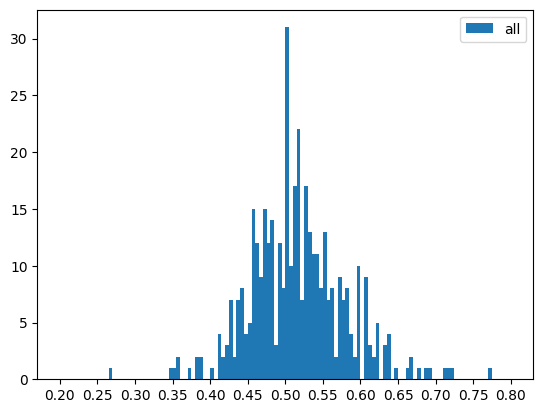

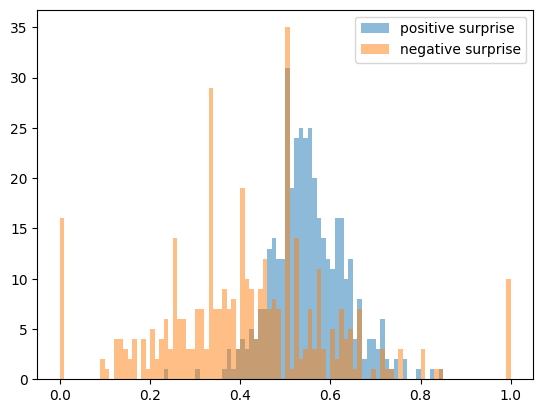

In [5]:
import matplotlib.pyplot as plt

plt.hist(fdf['% of positive impact of earnings'], 120, (0.2, 0.8), label='all')
plt.xticks([x / 100 for x in range(20,81,5)])
plt.legend(loc='upper right')
plt.show()
plt.hist(fdf['% of positive impact of earnings when positive surprise'], 100, (0, 1), alpha=0.5, label='positive surprise')
plt.hist(fdf['% of positive impact of earnings when negative surprise'], 100, (0, 1), alpha=0.5, label='negative surprise')
plt.legend(loc='upper right')
plt.show()

In [6]:
fdf = fdf.reset_index(drop=True)
correlated_goodness = [fdf.at[i, '% of positive impact of earnings'] if fdf.at[i, '% of positive impact of earnings'] >= 0.5 else 1 - fdf.at[i, '% of positive impact of earnings'] for i in range(len(fdf))]
fdf['correlated_goodness'] = correlated_goodness
sorted_fdf = fdf.sort_values(by=['average return after earnings'], ascending=False)

In [7]:
sorted_fdf.iloc[:30,:].reset_index(drop=True)

,ticker,company,# of earnings,% of positive impact of earnings,average return after earnings,# of positive surprise earnings,% of positive impact of earnings when positive surprise,average return after earnings when positive surprise,# of negative surprise earnings,% of positive impact of earnings when negative surprise,average return after earnings when negative surprise,correlated_goodness
0,ULTA,ULTA BEAUTY INC,60,0.633333,0.039607,54,0.629630,0.047636,4,0.500000,-0.105425,0.633333
1,NOW,SERVICENOW INC,40,0.775000,0.037039,34,0.823529,0.043765,2,1.000000,0.101886,0.775000
2,CRM,SALESFORCE COM INC,72,0.555556,0.023485,46,0.565217,0.015903,1,0.000000,-0.050166,0.555556
3,MNST,MONSTER BEVERAGE CORP NEW,71,0.690141,0.023322,32,0.843750,0.050544,22,0.409091,-0.020633,0.690141
4,FFIV,F 5 NETWORKS INC,92,0.608696,0.022836,73,0.616438,0.025537,6,0.333333,-0.023500,0.608696
5,KEYS,KEYSIGHT TECHNOLOGIES INC,33,0.636364,0.022184,29,0.655172,0.021456,2,0.000000,-0.008832,0.636364
6,ALGN,ALIGN TECHNOLOGY INC,87,0.563218,0.022135,67,0.641791,0.042210,15,0.333333,-0.058034,0.563218
7,FTNT,FORTINET INC,52,0.576923,0.020711,31,0.516129,0.024044,0,-1.000000,-1.000000,0.576923
8,SWKS,SKYWORKS SOLUTIONS INC,112,0.508929,0.019651,84,0.535714,0.026652,10,0.700000,0.015765,0.508929
9,EQIX,EQUINIX INC,85,0.623529,0.018550,45,0.688889,0.028633,36,0.500000,0.001783,0.623529


In [ ]:
sorted_fdf.to_csv("sorted_stocks_earnings_impact_avg_returns.csv", index=False)